In [22]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#Reading dataset
dataset = pd.read_csv("./Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
# Information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
# Checking whether any columns contain null values
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
# Describing the dataset
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
#Taking Annual Income vs Spending Score
X = dataset.iloc[:,[3,4]].values


In [28]:
#Importing KMeans
from sklearn.cluster import KMeans

In [29]:
#Making a list for storing the mean squares of all the points from the centroids
wcss = []

In [30]:
#Getting the inertia values in the list to find the optimum values of clusters 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

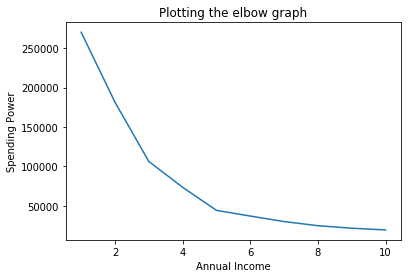

In [31]:
#Plotting the elbow graph
plt.plot(range(1,11),wcss)
plt.xlabel("Annual Income")
plt.ylabel('Spending Power')
plt.title('Plotting the elbow graph')
plt.show()

In [32]:
#Fitting and predicting with the optimum number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42)
y_kmeans = kmeans.fit_predict(X)

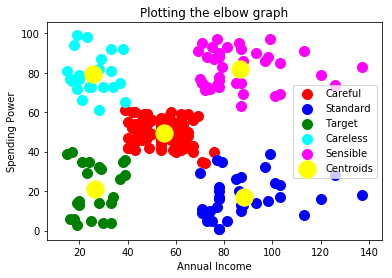

In [33]:
#Visualisation of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel('Spending Power')
plt.legend()
plt.title('Plotting the elbow graph')
plt.show()